In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [3]:
# Step 1: Load the data
train = pd.read_csv("D:/DOC/Projects/FUTURE_ML_T1/Datasets/train.csv", dtype={'StateHoliday': str})
store = pd.read_csv("D:/DOC/Projects/FUTURE_ML_T1/Datasets/store.csv")


In [5]:
# Step 2: Merge datasets on 'Store'
data = pd.merge(train, store, on='Store', how='left')


In [7]:
# Step 3: Convert 'Date' to datetime and extract features
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day
data['WeekOfYear'] = data['Date'].dt.isocalendar().week.astype(int)


In [9]:
# Step 4: Handle missing values
store['CompetitionDistance'] = store['CompetitionDistance'].fillna(store['CompetitionDistance'].median())
store['CompetitionOpenSinceMonth'] = store['CompetitionOpenSinceMonth'].fillna(0)
store['CompetitionOpenSinceYear'] = store['CompetitionOpenSinceYear'].fillna(0)
store['Promo2SinceWeek'] = store['Promo2SinceWeek'].fillna(0)
store['Promo2SinceYear'] = store['Promo2SinceYear'].fillna(0)
store['PromoInterval'] = store['PromoInterval'].fillna("None")


In [11]:
# Step 5: Encode categorical variables
cat_cols = ['StateHoliday', 'StoreType', 'Assortment', 'PromoInterval']
le = LabelEncoder()
for col in cat_cols:
    data[col] = le.fit_transform(data[col].astype(str))


In [13]:
# Step 6: Filter out closed stores and zero sales
data = data[(data['Open'] == 1) & (data['Sales'] > 0)]


In [15]:
# Step 7: Drop unused columns
data.drop(['Customers', 'Date'], axis=1, inplace=True)

In [17]:
# Step 8: Define features and target
X = data.drop(['Sales'], axis=1)
y = data['Sales']

In [19]:
# Step 9: Train-test split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
# Step 10: Train Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [23]:
# Step 11: Evaluate
y_pred = model.predict(X_val)
mae = mean_absolute_error(y_val, y_pred)
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
r2 = r2_score(y_val, y_pred)


In [25]:
print("✅ Model Evaluation:")
print(f"MAE  (Mean Absolute Error): {mae:.2f}")
print(f"RMSE (Root Mean Squared Error): {rmse:.2f}")
print(f"R² Score: {r2:.4f}")

✅ Model Evaluation:
MAE  (Mean Absolute Error): 574.09
RMSE (Root Mean Squared Error): 881.99
R² Score: 0.9194


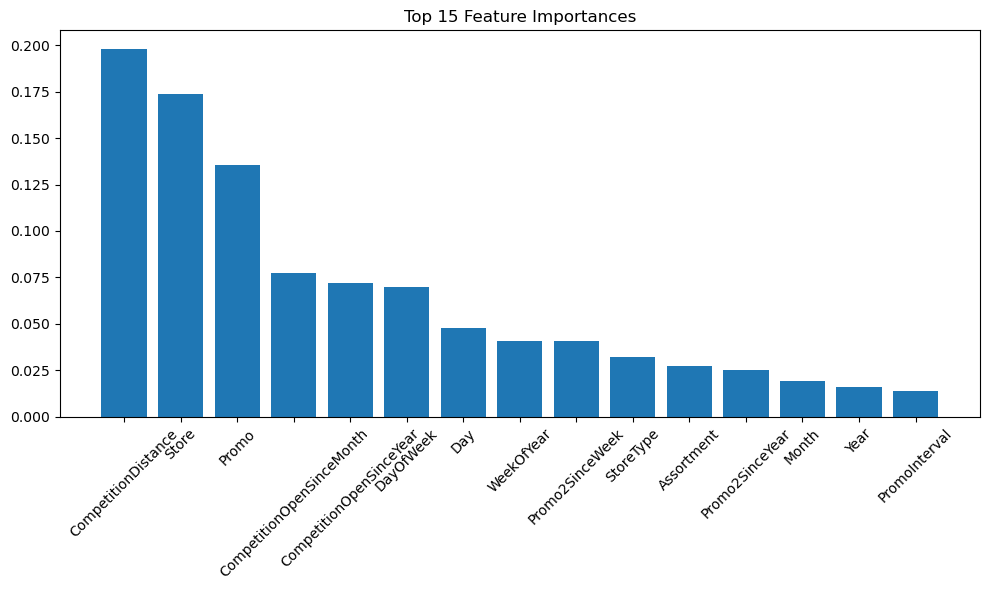

In [27]:
import matplotlib.pyplot as plt

# Get feature importances
importances = model.feature_importances_
feature_names = X.columns

# Sort by importance
indices = np.argsort(importances)[::-1]

# Plot the top 15 important features
plt.figure(figsize=(10, 6))
plt.title("Top 15 Feature Importances")
plt.bar(range(15), importances[indices][:15], align='center')
plt.xticks(range(15), feature_names[indices][:15], rotation=45)
plt.tight_layout()
plt.show()


In [29]:
import joblib

# Save model
joblib.dump(model, "rossmann_sales_model.pkl")
print("🎉 Model saved as 'rossmann_sales_model.pkl'")


🎉 Model saved as 'rossmann_sales_model.pkl'


In [39]:
# Load test data
test = pd.read_csv("D:/DOC/Projects/FUTURE_ML_T1/Datasets/test.csv")
test = pd.merge(test, store, on='Store', how='left')

# Date features
test['Date'] = pd.to_datetime(test['Date'], errors='coerce')
test['Year'] = test['Date'].dt.year
test['Month'] = test['Date'].dt.month
test['Day'] = test['Date'].dt.day
test['WeekOfYear'] = test['Date'].dt.isocalendar().week.astype(int)

# Handle missing values
test['CompetitionDistance'].fillna(data['CompetitionDistance'].median(), inplace=True)
test['CompetitionOpenSinceMonth'].fillna(0, inplace=True)
test['CompetitionOpenSinceYear'].fillna(0, inplace=True)
test['Promo2SinceWeek'].fillna(0, inplace=True)
test['Promo2SinceYear'].fillna(0, inplace=True)
test['PromoInterval'].fillna("None", inplace=True)

# Encode categorical
for col in cat_cols:
    test[col] = le.fit_transform(test[col].astype(str))

# Drop unused columns
test.drop(['Date'], axis=1, inplace=True)

# Fill the missing Open column if any
test['Open']= test['Open'].fillna(1, inplace=True)

# Predict
test_features = test.drop(['Id'], axis=1)
predictions = model.predict(test_features)

# Prepare submission
submission = pd.DataFrame({'Id': test['Id'], 'Sales': predictions})
submission.to_csv("submission.csv", index=False)
print("📁 Submission file 'submission.csv' created!")


C:\Users\monik\AppData\Local\Temp\ipykernel_21360\2136379998.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test['CompetitionDistance'].fillna(data['CompetitionDistance'].median(), inplace=True)
C:\Users\monik\AppData\Local\Temp\ipykernel_21360\2136379998.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting v

📁 Submission file 'submission.csv' created!


In [41]:
import pandas as pd

# Load the file
submission = pd.read_csv("submission.csv")

# Display the first few rows
submission.head()


Id     Sales
0   1   7526.62
1   2   7595.50
2   3  10926.85
3   4   5120.22
4   5   6509.22